# Length Unit Converter

**Version: 3.0**

**New:**
- Merged Components.
- Migrated GUI to HoloViz Panel (https://panel.holoviz.org/).

**Features:**

## Code Structure

**I. Import**
- Import Python Packages

**II. Initialization**
- Initialization of Panel

**III. Variables**
- Conversion Factors
- Styling
- Widgets
- Layout

**IV. Functions**
- load_units()
- calculate()
- submit()

**V. Callbacks**
- Button Callbacks

**VI. Execution**
- Serve App

## I. Import

In [17]:
import panel as pn

## II. Initialization

In [18]:
pn.extension(theme='dark')

## III. Variables

### Conversion Factors

In [19]:
# Dictionary storing conversion factors for different unit types
unit_factors = {
    'SI_Units': {
        'km': 10**3, 'hm': 10**2, 'dam': 10**1, 'm': 10**0,
        'dm': 10**-1, 'cm': 10**-2, 'mm': 10**-3, 'μm': 10**-6,
        'nm': 10**-9, 'pm': 10**-12, 'fm': 10**-15
    },
    'US_Units': {
        'm': 1, 'km': 1000, 'cm': 10**-2, 'mile': 1609.44, 'yard': 0.9144, 'foot': 0.3048, 'inch': 0.0254
    },
    'Naut_Units': {
        'm': 1, 'km': 1000, 'mile': 1609.44, 'nautical mile': 1852
    },
    'Astro_Units': {
        'AU': 1.49*10**11, 'light year': 9.461*10**15, 'light hour': 1.079*10**12,
        'light minute': 1.799*10**9, 'light second': 2.998*10**6, 'parsec': 3.086*10**16,
        'kiloparsec': 3.086*10**19, 'megaparsec': 3.086*10**22, 'meter': 1, 'kilometer': 10**3,
        'gigameter': 10**9, 'megameter': 10**10, 'terameter': 10**12, 'petameter': 10**15,
        'exameter': 10**18, 'zettameter': 10**21, 'yottameter': 10**24, 'ronnameter': 10**27    
    },
    'Atom_Units': {
        'femtometer': 10**-15, 'picometer': 10**-12, 'angstrom': 10**-10,
        'nanometer': 10**-9, 'micrometer': 10**-6
    }
}

### Styling

In [23]:
# Custom CSS for Background & Images
custom_css = """
    /* Set background color */
        body {
        background-color: #2F2A46;
    }
    
    .custom-pane {
    padding: 5px;
    background-color: #211D35;
    }
"""

# Apply the custom CSS to the notebook
pn.config.raw_css.append(custom_css)

In [26]:
# Widget CSS settings
pn.extension(raw_css=["""
.custom-style {
    background-color: #3D4654;
    color: #FFFFFF;
    border: 2px solid #3D4654;
    border-radius: 5px;
    padding: 5px;
}

.custom-style:hover {
    background-color: #211D35;
}

.custom-style input {
    background-color: #3D4654; /* Set the input mask color */
    color: ##8D8A8A; /* Set text color inside the input field */
    border: none; /* Optional: If you want to remove the border from the input field */
}

.custom-style input:focus {
    background-color: #3D4654; /* Set background color when focused */
    outline: none; /* Optional: Remove outline on focus */
}

/* Custom button styles */
.custom-button {
    background-color: #C71585; /* Button color */
    color: #FFFFFF; /* Text color */
    border: 2px solid #C71585; /* Border color */
    border-radius: 5px;
    padding: 10px 10px;
    cursor: pointer; /* Add pointer cursor on hover */
}

.custom-button:hover {
    background-color: #3A2E6B; /* Hover color */
    border-color: #3A2E6B; /* Change border color on hover */
}

.custom-button:active {
    background-color: #2D1C47; /* Active state */
    border-color: #2D1C47;
}

"""])

### Widgets

#### Input & Output

In [27]:
# --- Widgets for input/output values and units --------------------------------

# Widgets
value_in = pn.widgets.FloatInput(value=1, width=200, format='0.4f', css_classes=['custom-style'])
value_out = pn.widgets.FloatInput(value=1, width=200, css_classes=['custom-style'], disabled=True)

unit_in = pn.widgets.Select(options=unit_factors['SI_Units'], width=200, css_classes=['custom-style'])
unit_out = pn.widgets.Select(options=unit_factors['SI_Units'], width=200, css_classes=['custom-style'])

# Button to perform conversion
submit_button = pn.widgets.Button(name='Convert', css_classes=['custom-button'], width=420, height=60)

#### Labels

In [28]:
# --- Labels ------------------------------------------------------------------

# Image paths
label_FROM_path = './images/labels/FROM_UNIT-50px.png'
label_TO_path = './images/labels/TO_UNIT-50px.png'
label_INPUT_path = './images/labels/INPUT-50px.png'
label_OUTPUT_path = './images/labels/OUTPUT-50px.png'

# Image widgets for labels 

label_from = pn.pane.Image(label_FROM_path, width=150)
label_to = pn.pane.Image(label_TO_path, width=150)
label_in = pn.pane.Image(label_INPUT_path, width=100)
label_out = pn.pane.Image(label_OUTPUT_path, width=100)

# Group Widgets with Labels
in_mask = pn.Column(label_in, value_in)
out_mask = pn.Column(label_out, value_out)

in_select = pn.Column(label_from, unit_in)
out_select = pn.Column(label_to, unit_out)

#### Sidebar Menu Buttons

In [29]:
# --- Sidebar Buttons ----------------------------------------------------------

# Create a column of buttons for unit categories
SI_button = pn.widgets.Button(name='SI Units', icon='world', width=200, height=65, css_classes=['custom-button'])
US_button = pn.widgets.Button(name='Imperial Units', icon='star', width=200, height=65, css_classes=['custom-button'])
Naut_button = pn.widgets.Button(name='Nautical Units', icon='anchor', width=200, height=65, css_classes=['custom-button'])
Astro_button = pn.widgets.Button(name='Astronomical Scale', icon='sparkles', width=200, height=65, css_classes=['custom-button'])
Atom_button = pn.widgets.Button(name='Atomic & Particle Scale', icon='atom',width=200, height=65, css_classes=['custom-button'])

#### Banners

In [30]:
# --- Banners ----------------------------------------------------------

# Correct path to the image
banner_1_path = './images/banners/1-BANNER-SI.png'
banner_2_path = './images/banners/2-BANNER-IMPERIAL-METRIC.png'
banner_3_path = './images/banners/3-BANNER-NAUT.png'
banner_4_path = './images/banners/4-BANNER-ASTRO.png'
banner_5_path = './images/banners/5-BANNER-ATOM-MOL.png'

# Display image with an adjustable width
image_pane = pn.pane.Image(banner_1_path, width=440)


### Layout

In [31]:
# --- Layout -------------------------------------------------------------------

# Sidebar layout (column of buttons)
sidebar_panel = pn.Column(SI_button, US_button, Naut_button, Astro_button, Atom_button)

# Main layout (input, output, and conversion widgets)
content = pn.Column(
    pn.Row(in_mask, out_mask),
    pn.Row(in_select, out_select),
    submit_button,
    css_classes=['custom-pane']
)

content_panel = pn.Column(image_pane, content)

# Combine sidebar and main content
main = pn.Row(sidebar_panel, content_panel)

layout = pn.Column(main)

## IV. Functions

In [32]:
# Function to update the unit selection widgets based on the selected category
def load_units(category):
    unit_in.options = unit_factors[category]
    unit_out.options = unit_factors[category]

# Function to perform the conversion
def calculate(value_in, unit_in, unit_out):
    return value_in * unit_in / unit_out

# Function to handle the submit button click event
def submit(event):
    result = calculate(value_in.value, unit_in.value, unit_out.value)
    value_out.value = round(result, 4)

# Function to update the banner image based on the selected category
def update_banner(category):
    if category == 'SI_Units':
        image_pane.object = banner_1_path
    elif category == 'US_Units':
        image_pane.object = banner_2_path
    elif category == 'Naut_Units':
        image_pane.object = banner_3_path
    elif category == 'Astro_Units':
        image_pane.object = banner_4_path
    elif category == 'Atom_Units':
        image_pane.object = banner_5_path

## V. Callbacks

In [33]:
# Button callbacks to load different unit categories and update the banner
SI_button.on_click(lambda event: [load_units('SI_Units'), update_banner('SI_Units')])
US_button.on_click(lambda event: [load_units('US_Units'), update_banner('US_Units')])
Naut_button.on_click(lambda event: [load_units('Naut_Units'), update_banner('Naut_Units')])
Astro_button.on_click(lambda event: [load_units('Astro_Units'), update_banner('Astro_Units')])
Atom_button.on_click(lambda event: [load_units('Atom_Units'), update_banner('Atom_Units')])

# Submit button callback to perform the conversion
submit_button.on_click(submit)

Watcher(inst=Button(css_classes=['custom-button'], height=72, name='Convert', sizing_mode='fixed', width=420), cls=<class 'panel.widgets.button.Button'>, fn=<function submit at 0x7f9debaecd60>, mode='args', onlychanged=False, parameter_names=('clicks',), what='value', queued=False, precedence=0)

## VI. Execution

Column
    [0] Row
        [0] Column
            [0] Button(css_classes=['custom-button'], height=65, icon='world', name='SI Units', sizing_mode='fixed', width=200)
            [1] Button(css_classes=['custom-button'], height=65, icon='star', name='Imperial Units', sizing_mode='fixed', width=200)
            [2] Button(css_classes=['custom-button'], height=65, icon='anchor', name='Nautical Units', sizing_mode='fixed', width=200)
            [3] Button(css_classes=['custom-button'], height=65, icon='sparkles', name='Astronomical Scale', sizing_mode='fixed', width=200)
            [4] Button(css_classes=['custom-button'], height=65, icon='atom', name='Atomic & Particle Scale', sizing_mode='fixed', width=200)
        [1] Column
            [0] Image(str, css_classes=['custom-image'], width=420)
            [1] Row
                [0] Column
                    [0] Image(str, width=100)
                    [1] FloatInput(css_classes=['custom-style'], format='0.4f', value=1, width=200)
                [1] Column
                    [0] Image(str, width=100)
                    [1] FloatInput(css_classes=['custom-style'], disabled=True, value=1, width=200)
            [2] Row
                [0] Column
                    [0] Image(str, width=150)
                    [1] Select(css_classes=['custom-style'], options={'km': 1000, 'hm': 100, ...}, value=1000, width=200)
                [1] Column
                    [0] Image(str, width=150)
                    [1] Select(css_classes=['custom-style'], options={'km': 1000, 'hm': 100, ...}, value=1000, width=200)
            [3] Button(css_classes=['custom-button'], height=72, name='Convert', sizing_mode='fixed', width=420)
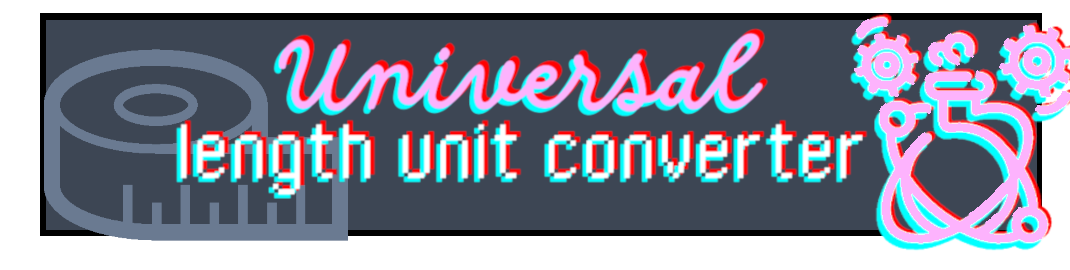
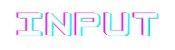
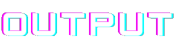
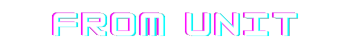
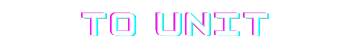

In [34]:
layout.servable()